<a href="https://colab.research.google.com/github/silviabord/datascience_unimib/blob/master/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Industry Lab Project
Fastweb



```
# This is formatted as code
```

[articolo interessante anomaly detection](https://**towardsdatascience**.com/how-to-use-machine-learning-for-anomaly-detection-and-condition-monitoring-6742f82900d7)

In [0]:
import pandas as pd
import numpy as np
import os
import pickle

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from scipy import stats
import seaborn as sns
from pylab import rcParams
from scipy.stats.mstats import mode


from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.style as style

rcParams['figure.figsize'] = 12,8
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:20,.2f}'.format

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/industry_lab/training.csv', sep = ';')

In [0]:
#train.drop(['source'], axis=1, inplace=True)

In [0]:
data['TS'] = pd.to_datetime(data['TS']) 

In [0]:
data.dtypes

TS              datetime64[ns]
USAGE                    int64
KIT_ID                   int64
AVG_SPEED_DW             int64
NUM_CLI                  int64
VAR_CLASS                int64
dtype: object

# Exploratory Data Analysis

In [0]:
print(data.shape)

(16522034, 6)


In [0]:
data['VAR_CLASS'].value_counts()

0    16521526
2         472
1          36
Name: VAR_CLASS, dtype: int64




```
# We only have  508 observation over 16.5 M labeles as as anomaly. We are dealing with imbalanced class issue.

```



In [0]:
len(data['KIT_ID'].value_counts())

1977

In [0]:
data[data['VAR_CLASS'] != 0]['KIT_ID'].value_counts()

1629361016    324
3409364152    152
2487219358     32
Name: KIT_ID, dtype: int64





```
# Anomalies affect just 3 over 1977 KIT_ID 
```



In [0]:
#kit_anomali = data[data['VAR_CLASS'] != 0]['KIT_ID'].unique()



```
# Check NA

```




In [0]:
data.isnull().sum()

TS              0
USAGE           0
KIT_ID          0
AVG_SPEED_DW    0
NUM_CLI         0
VAR_CLASS       0
dtype: int64



```
# How many observation per KIT_ID?
```



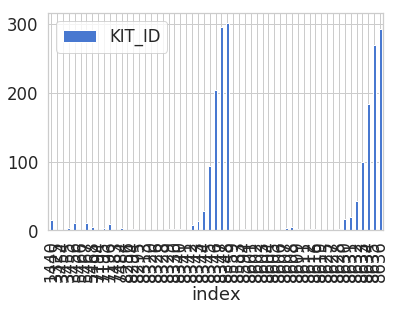

In [0]:
a = pd.DataFrame(data['KIT_ID'].value_counts().value_counts())
a = a.reset_index()
a = a.sort_values('index')
#a.dtypes
a.plot.bar(x= "index" , y="KIT_ID")

In [0]:
data['n_row'] = data['TS'].groupby(data['KIT_ID']).transform('count')

In [0]:
data.head()

,TS,USAGE,KIT_ID,AVG_SPEED_DW,NUM_CLI,VAR_CLASS,n_row
0,2018-11-01,126,3460333709,87337,2,0,8347
1,2018-11-01,302,3755290149,122460,40,0,8633
2,2018-11-01,3272,2615826724,83676,3,0,8346
3,2018-11-01,5076,4122339741,77366,2,0,8347
4,2018-11-01,7648,2935569003,80332,2,0,8345


In [0]:
data['KIT_ID'].value_counts().describe()

count               1,977.00
mean                8,357.12
std                   828.41
min                 1,440.00
25%                 8,347.00
50%                 8,348.00
75%                 8,635.00
max                 8,636.00
Name: KIT_ID, dtype: float64

In [0]:
print(
data[data['KIT_ID'] == 1629361016].shape,
data[data['KIT_ID'] == 2487219358].shape,
data[data['KIT_ID'] == 3409364152].shape  
)

(8348, 6) (3455, 6) (8632, 6)




```
# Kits with anomalies are observed for 29, 11 and 30 days each
```





```
# AVG_SPEED_DW is constant for each kit
```



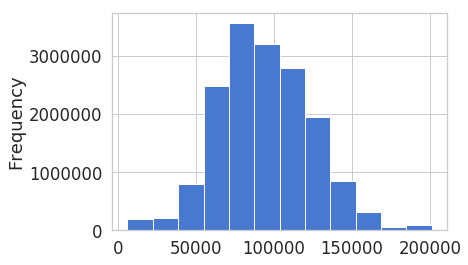

In [0]:
data['AVG_SPEED_DW'].plot.hist(bins=12)

In [0]:
data['AVG_SPEED_DW'].describe()

count          16,522,034.00
mean               94,322.25
std                29,843.95
min                 6,249.00
25%                73,706.00
50%                92,720.00
75%               114,935.00
max               201,096.00
Name: AVG_SPEED_DW, dtype: float64

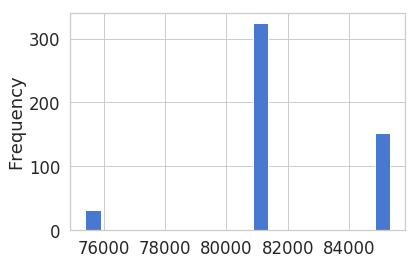

In [0]:
data[data['VAR_CLASS'] != 0]['AVG_SPEED_DW'].plot.hist(bins=20)



```
# AVG_SPEED_DW of kits with anomalies is below mean and median
```



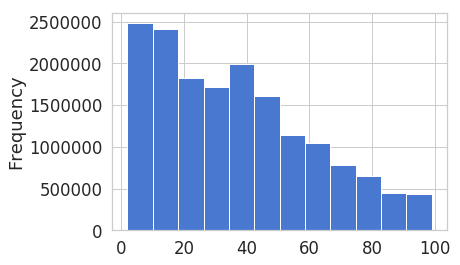

In [0]:
data['NUM_CLI'].plot.hist(bins=12)

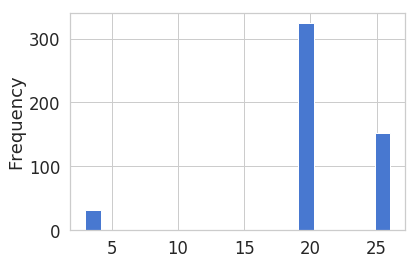

In [0]:
data[data['VAR_CLASS'] != 0]['NUM_CLI'].plot.hist(bins=20)



```
# NUM_CLI of kits with anomalies is also below mean and median
```



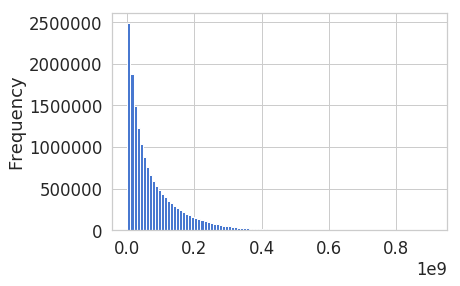

In [0]:
data['USAGE'].plot.hist(bins=100)

In [0]:
data['USAGE'].describe()

count          16,522,034.00
mean           75,060,011.82
std            80,055,243.79
min                     0.00
25%            16,880,727.00
50%            46,694,447.00
75%           107,384,541.75
max           907,608,665.00
Name: USAGE, dtype: float64

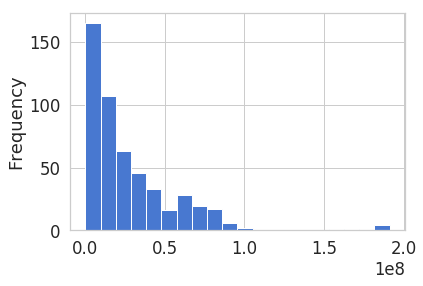

In [0]:
data[(data['VAR_CLASS'] != 0)]['USAGE'].plot.hist(bins=20)

In [0]:

from pandas.tools.plotting import parallel_coordinates

parallel_coordinates(data, 'KIT_ID', colormap=plt.get_cmap("Set2"))
plt.show()


pd.plotting.parallel_coordinates(
        data,
        'Name',
        #cols=['USAGE','AVG_SPEED_DW', 'NUM_CLI'],
        color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()

KeyError: ignored

#  Focus on 3 kits with anomalies


**3409364152**

In [0]:
data

In [0]:
print(
data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == 3409364152)]['TS'].min(),
"\n",
data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == 3409364152)]['TS'].max()
)

2018-11-06 19:55:00 
 2018-11-07 08:30:00


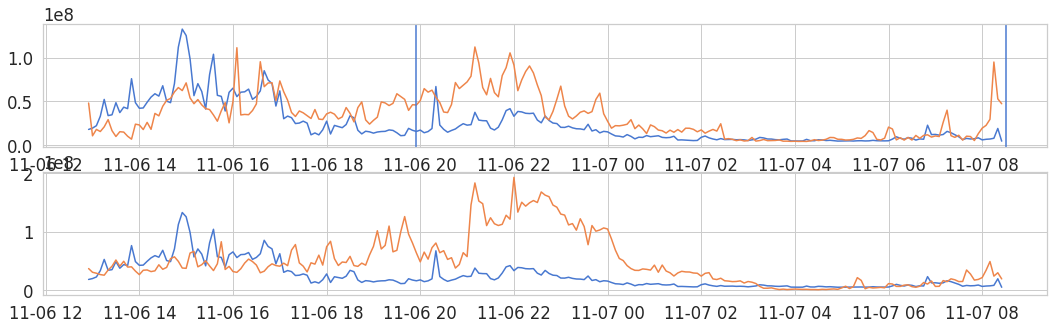

In [0]:
rcParams['figure.figsize'] = 18,5

fig, (ax1, ax2) = plt.subplots(2, 1)


ax1.plot(data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['TS'],
         data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
         data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 2967086994)]['TS'],
         data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 2967086994)]['USAGE']
        )

ax2.plot(data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['TS'],
         data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
         data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['TS'],
         data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-21 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE']
        )
ax1.axvline(x=pd.to_datetime('2018-11-06 19:55:00'))
ax1.axvline(x=pd.to_datetime('2018-11-07 08:30:00'))

In [0]:
style.available


['classic',
 'seaborn-notebook',
 '_classic_test',
 'seaborn-muted',
 'fast',
 'seaborn-poster',
 'seaborn-white',
 'dark_background',
 'seaborn-talk',
 'Solarize_Light2',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'seaborn-dark',
 'seaborn-paper',
 'seaborn-pastel',
 'grayscale',
 'tableau-colorblind10',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn',
 'seaborn-dark-palette',
 'ggplot',
 'seaborn-deep',
 'bmh',
 'seaborn-ticks']

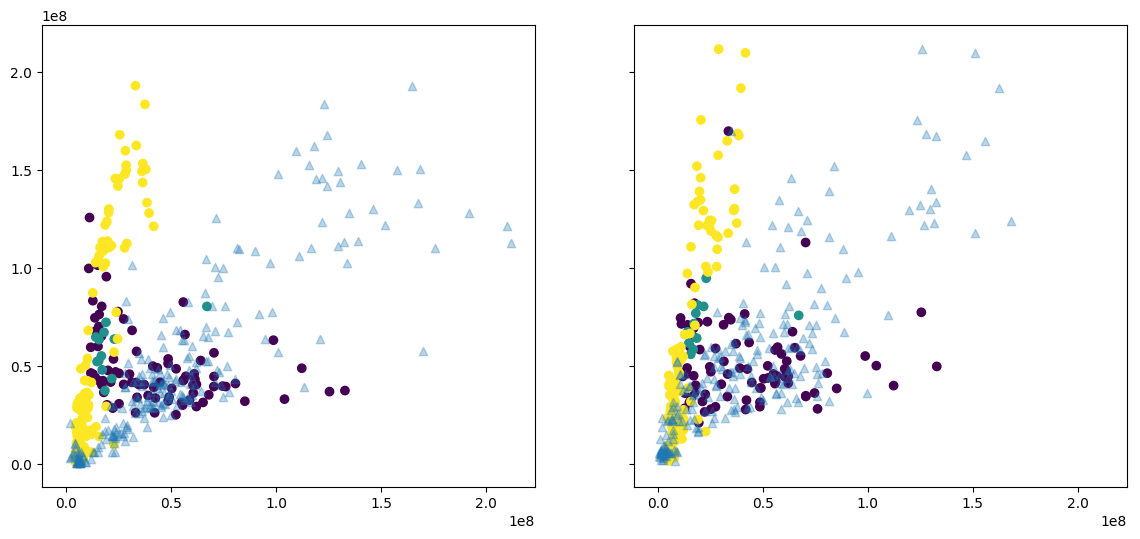

In [0]:
rcParams['figure.figsize'] = 14,6
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

#anomaly day vs normal day
ax1.scatter(
x = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
y = data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-21 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
c = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['VAR_CLASS']
)

#normal day vs normal day
ax1.scatter(
x = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-28 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
y = data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-21 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
marker='^',
alpha=0.3
)




#anomaly day vs normal day
ax2.scatter(
x = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
y = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-28 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
c = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['VAR_CLASS']
)

    
ax2.scatter(
x = data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-14 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
y = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-28 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
marker='^',
alpha=0.3
)

#fig.suptitle('Anomaly Day vs Same week day in normal condition')
#fig.subplots_adjust(hspace=0.3)
plt.style.use('default')
#plt.style.use('grayscale')

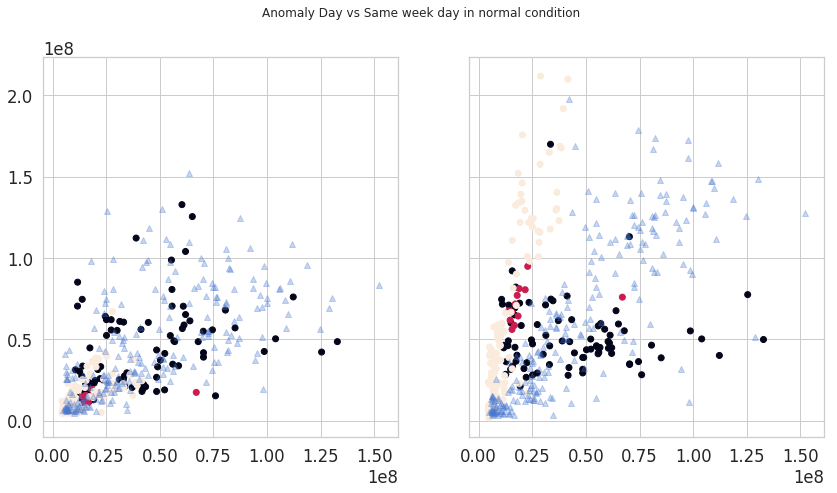

In [0]:
2838554739

rcParams['figure.figsize'] = 14,7
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

#anomaly day vs normal day
ax1.scatter(
x = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
y = data[(data['TS'] >= '2018-11-06 11:55:00') & (data['TS'] < '2018-11-07 07:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
c = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['VAR_CLASS']
)

#normal day vs normal day
ax1.scatter(
x = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 2838554739)]['USAGE'],
y = data[(data['TS'] >= '2018-11-06 11:55:00') & (data['TS'] < '2018-11-07 07:30:00') & (data['KIT_ID'] == 2838554739)]['USAGE'],
marker='^',
alpha=0.3
)




#anomaly day vs normal day
ax2.scatter(
x = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
y = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-28 08:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE'],
c = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 3409364152)]['VAR_CLASS']
)

    
ax2.scatter(
x = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 08:30:00') & (data['KIT_ID'] == 2838554739)]['USAGE'],
y = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-28 08:30:00') & (data['KIT_ID'] == 2838554739)]['USAGE'],
marker='^',
alpha=0.3
)

fig.suptitle('Anomaly Day vs Same week day in normal condition')
fig.subplots_adjust(hspace=0.3)


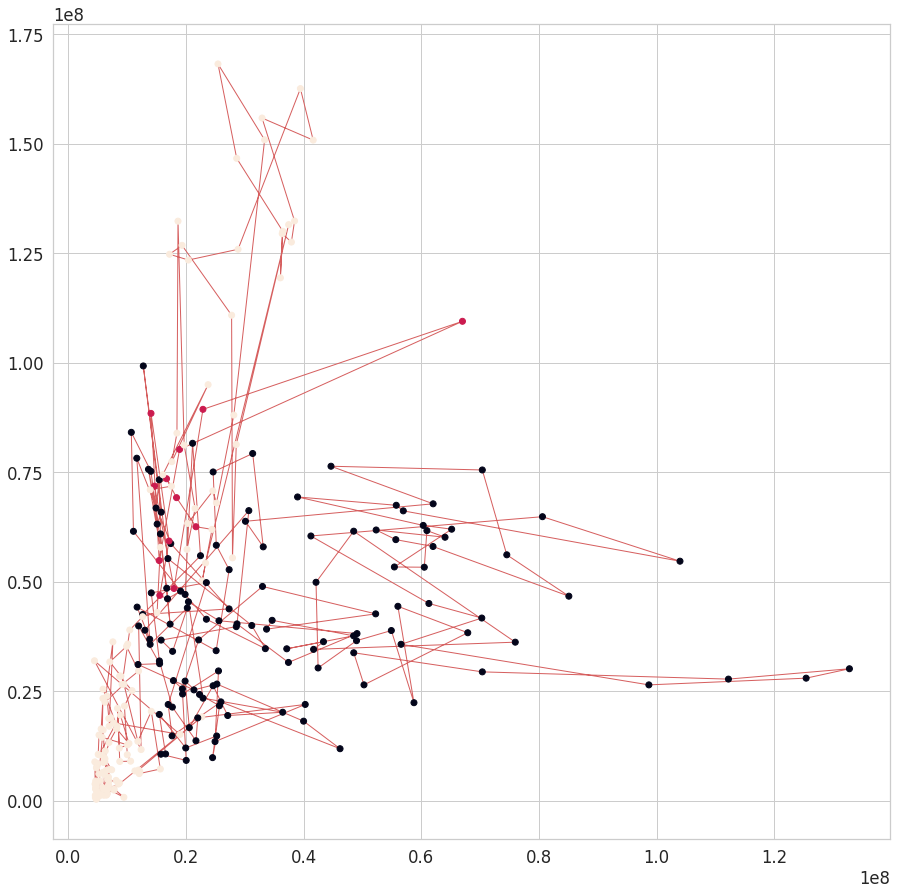

In [0]:
rcParams['figure.figsize'] = 15, 15
x=data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 12:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE']
y=data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-14 12:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE']
#plt.subplot(212)
plt.plot(x, y, 'C3', zorder=1, lw=1)
plt.scatter(
x = x,
y = y,
c = data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 12:30:00') & (data['KIT_ID'] == 3409364152)]['VAR_CLASS'],
zorder=2
)


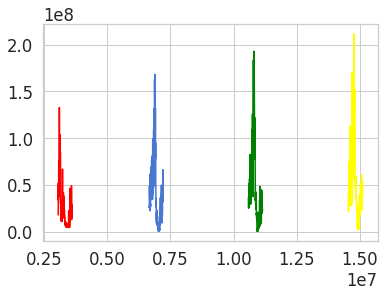

In [0]:
rcParams['figure.figsize'] = 6, 4

x=data[(data['TS'] >= '2018-11-06 12:55:00') & (data['TS'] < '2018-11-07 12:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE']
y=data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-14 12:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE']
z=data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-21 12:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE']
w=data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-28 12:30:00') & (data['KIT_ID'] == 3409364152)]['USAGE']


plt.plot(x, 'red')
plt.plot(y)
plt.plot(z, 'green')
plt.plot(w, 'yellow')


**1629361016**

In [0]:
print(data[ (data['KIT_ID'] == 1629361016)]['TS'].min(),
data[ (data['KIT_ID'] == 1629361016)]['TS'].max()
     )

2018-11-01 00:00:00 2018-11-30 23:55:00


In [0]:
min_a = data[(data['VAR_CLASS'] == 2) & (data['KIT_ID'] == 1629361016)]['TS'].min(),
max_a = data[(data['VAR_CLASS'] == 2) & (data['KIT_ID'] == 1629361016)]['TS'].max()

print(min_a, max_a)

(Timestamp('2018-11-27 18:50:00'),) 2018-11-28 20:45:00


to do:
split anomaly into 2, one per day

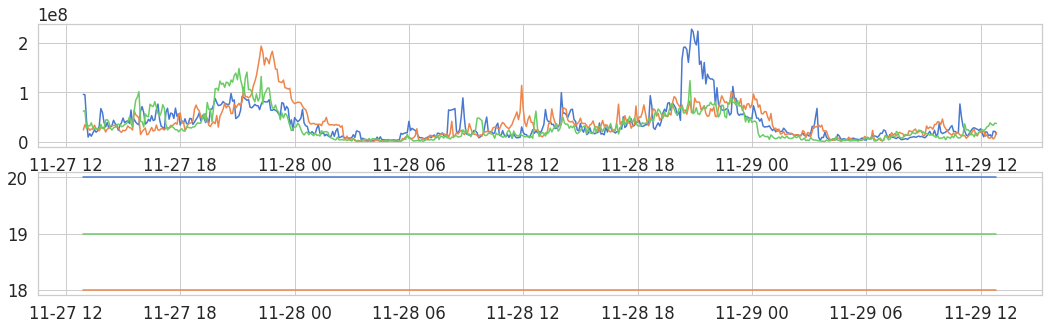

In [0]:
rcParams['figure.figsize'] = 18,5
fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 12:55:00') & (data['KIT_ID'] == 1629361016)]['TS'],
         data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 12:55:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
         data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 12:55:00') & (data['KIT_ID'] == 1629361016)]['TS'],
         data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-15 12:55:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
         data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 12:55:00') & (data['KIT_ID'] == 1629361016)]['TS'],
         data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-22 12:55:00') & (data['KIT_ID'] == 1629361016)]['USAGE']
        )

ax2.plot(data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 12:55:00') & (data['KIT_ID'] == 1629361016)]['TS'],
         data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 12:55:00') & (data['KIT_ID'] == 1629361016)]['NUM_CLI'],
         data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 12:55:00') & (data['KIT_ID'] == 1629361016)]['TS'],
         data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-15 12:55:00') & (data['KIT_ID'] == 1629361016)]['NUM_CLI'],
         data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 12:55:00') & (data['KIT_ID'] == 1629361016)]['TS'],
         data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-22 12:55:00') & (data['KIT_ID'] == 1629361016)]['NUM_CLI']
        )

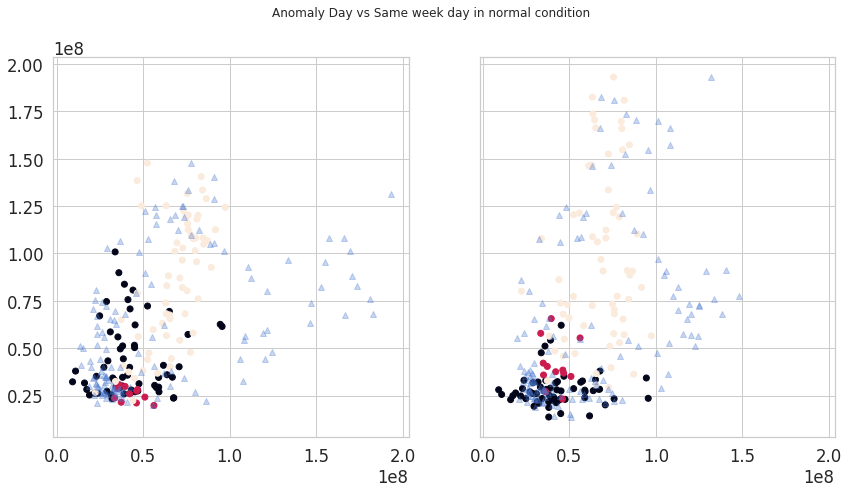

In [0]:
rcParams['figure.figsize'] = 14,7
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)


#plt.subplot()
ax1.scatter(
x = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-27 23:59:59') & (data['KIT_ID'] == 1629361016)]['USAGE'],
y = data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-20 23:59:59') & (data['KIT_ID'] == 1629361016)]['USAGE'],
c = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-27 23:59:59') & (data['KIT_ID'] == 1629361016)]['VAR_CLASS']
)

    
ax1.scatter(
x = data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-13 23:59:59') & (data['KIT_ID'] == 1629361016)]['USAGE'],
y = data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-20 23:59:59') & (data['KIT_ID'] == 1629361016)]['USAGE'],
marker='^',
alpha=0.3
)


#plt.subplot()
#plt.subplot()
ax2.scatter(
x = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-27 23:59:59') & (data['KIT_ID'] == 1629361016)]['USAGE'],
y = data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-13 23:59:59') & (data['KIT_ID'] == 1629361016)]['USAGE'],
c = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-27 23:59:59') & (data['KIT_ID'] == 1629361016)]['VAR_CLASS']
)

ax2.scatter(
x = data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-20 23:59:59') & (data['KIT_ID'] == 1629361016)]['USAGE'],
y = data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-13 23:59:59') & (data['KIT_ID'] == 1629361016)]['USAGE'],
marker='^',
alpha=0.3
)

fig.suptitle('Anomaly Day vs Same week day in normal condition')
fig.subplots_adjust(hspace=0.3)


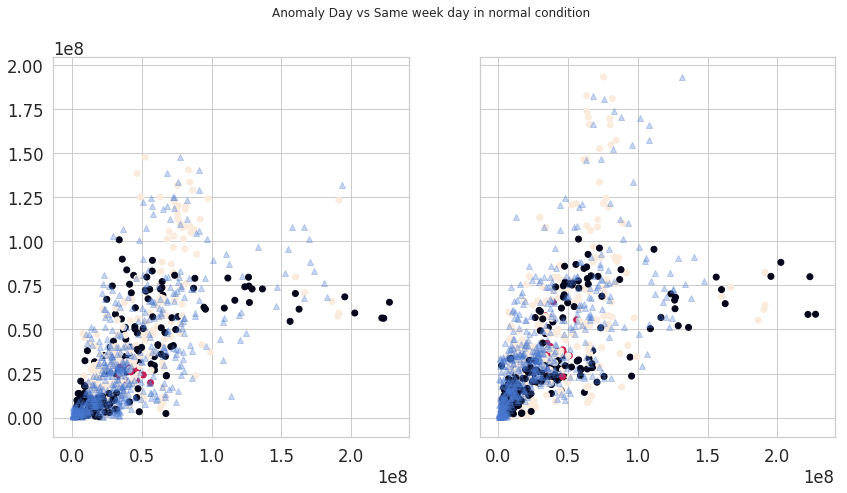

In [0]:
rcParams['figure.figsize'] = 14,7
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)


#plt.subplot()
ax1.scatter(
x = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 08:30:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
y = data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-22 08:30:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
c = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 08:30:00') & (data['KIT_ID'] == 1629361016)]['VAR_CLASS']
)

    
ax1.scatter(
x = data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-15 08:30:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
y = data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-22 08:30:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
marker='^',
alpha=0.3
)


#plt.subplot()
#plt.subplot()
ax2.scatter(
x = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 08:30:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
y = data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-15 08:30:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
c = data[(data['TS'] >= '2018-11-27 12:55:00') & (data['TS'] < '2018-11-29 08:30:00') & (data['KIT_ID'] == 1629361016)]['VAR_CLASS']
)

ax2.scatter(
x = data[(data['TS'] >= '2018-11-20 12:55:00') & (data['TS'] < '2018-11-22 08:30:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
y = data[(data['TS'] >= '2018-11-13 12:55:00') & (data['TS'] < '2018-11-15 08:30:00') & (data['KIT_ID'] == 1629361016)]['USAGE'],
marker='^',
alpha=0.3
)

fig.suptitle('Anomaly Day vs Same week day in normal condition')
fig.subplots_adjust(hspace=0.3)


**2487219358**

seems that in prev period kit was at near 0 use

In [0]:
print(
data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == 2487219358)]['TS'].min(),
data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == 2487219358)]['TS'].max()
)

2018-11-30 21:20:00 2018-11-30 23:55:00


In [0]:
print(
data[(data['KIT_ID'] == 2487219358)]['TS'].min(),
data[(data['KIT_ID'] == 2487219358)]['TS'].max()
)

2018-11-19 00:00:00 2018-11-30 23:55:00


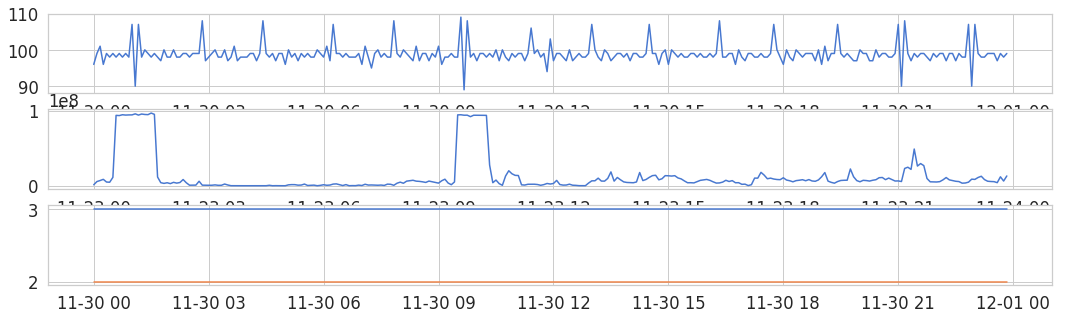

In [0]:
rcParams['figure.figsize'] = 18,5
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.plot(data[(data['TS'] >= '2018-11-30 00:00:00') & (data['TS'] < '2018-11-30 23:55:00') & (data['KIT_ID'] == 2487219358)]['TS'],
         data[(data['TS'] >= '2018-11-30 00:00:00') & (data['TS'] < '2018-11-30 23:55:00') & (data['KIT_ID'] == 2487219358)]['USAGE']
        )

ax2.plot(data[(data['TS'] >= '2018-11-23 00:00:00') & (data['TS'] < '2018-11-23 23:55:00') & (data['KIT_ID'] == 2487219358)]['TS'],
         data[(data['TS'] >= '2018-11-23 00:00:00') & (data['TS'] < '2018-11-23 23:55:00') & (data['KIT_ID'] == 2487219358)]['USAGE']
        )

ax3.plot(data[(data['TS'] >= '2018-11-30 00:00:00') & (data['TS'] < '2018-11-30 23:55:00') & (data['KIT_ID'] == 2487219358)]['TS'],
         data[(data['TS'] >= '2018-11-30 00:00:00') & (data['TS'] < '2018-11-30 23:55:00') & (data['KIT_ID'] == 2487219358)]['NUM_CLI'],
         data[(data['TS'] >= '2018-11-30 00:00:00') & (data['TS'] < '2018-11-30 23:55:00') & (data['KIT_ID'] == 2487219358)]['TS'],
         data[(data['TS'] >= '2018-11-23 00:00:00') & (data['TS'] < '2018-11-23 23:55:00') & (data['KIT_ID'] == 2487219358)]['NUM_CLI']
        )

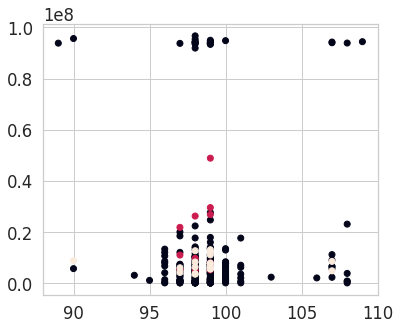

In [0]:
rcParams['figure.figsize'] =6,5

plt.scatter( x=data[(data['TS'] >= '2018-11-30 00:00:00') & (data['TS'] < '2018-11-30 23:55:00') & (data['KIT_ID'] == 2487219358)]['USAGE'],
             y=data[(data['TS'] >= '2018-11-23 00:00:00') & (data['TS'] < '2018-11-23 23:55:00') & (data['KIT_ID'] == 2487219358)]['USAGE'],
             c=data[(data['TS'] >= '2018-11-30 00:00:00') & (data['TS'] < '2018-11-30 23:55:00') & (data['KIT_ID'] == 2487219358)]['VAR_CLASS'])



In [0]:
 #def categorical_conversion(df,cat_col):
#  for i in range(len(cat_col)):
#    df[cat_col[i]]=df[cat_col[i]].astype('category')
#    return df

In [0]:
#cat_col = ['VAR_CLASS', 'KIT_ID']

In [0]:
#data = categorical_conversion(data, cat_col)

In [0]:
data.dtypes

TS              datetime64[ns]
USAGE                    int64
KIT_ID                   int64
AVG_SPEED_DW             int64
NUM_CLI                  int64
VAR_CLASS                int64
dtype: object

In [0]:
data.loc[data.VAR_CLASS == 2, 'VAR_CLASS'] = 1

In [0]:
data['VAR_CLASS'].value_counts()

0    16521526
1         508
Name: VAR_CLASS, dtype: int64

# Sample


```
# 2487219358, 3409364152 train
# 1629361016 test
```





```
# includere anomalie in X
# quanti giorni/ore prima dell anomalia includere
# kitid --> eiminiamo dei kit_id? in base a AVG_SPEED_DW e NUM_CLI ?
# 
```



In [0]:
kit_anomali

array([3409364152, 1629361016, 2487219358])



```
# Rimuovere KIT con AVG_SPEED_DW outlier

```



In [0]:
data.shape

(16522034, 6)

In [0]:
subset = data[
    (data['AVG_SPEED_DW'] > data['AVG_SPEED_DW'].quantile(.2)) & 
    (data['AVG_SPEED_DW'] < data['AVG_SPEED_DW'].quantile(.8)) 
]

In [0]:
data_non_anomaly = subset[subset.VAR_CLASS == 0.0]
data_non_anomaly = data_non_anomaly.sample(10000)
data_non_anomaly.shape

(10000, 6)

In [0]:
train, test = train_test_split(data_non_anomaly, test_size=0.2)

In [0]:
train = pd.concat(
    [
    subset[(subset['KIT_ID'] == 2487219358) | (subset['KIT_ID'] == 3409364152)],
    train
    ]
)

X_train = train.drop(['KIT_ID', 'TS', 'VAR_CLASS'], axis=1)
y_train = train['VAR_CLASS']

In [0]:
test = pd.concat(
    [
    subset[subset['KIT_ID'] == 1629361016],
    test
    ]
)
X_test = test.drop(['KIT_ID', 'TS', 'VAR_CLASS'], axis=1)
y_test = test['VAR_CLASS']

In [0]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
pd.Series(y_pred).value_counts()

0    10348
dtype: int64

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10024
           1       0.00      0.00      0.00       324

    accuracy                           0.97     10348
   macro avg       0.48      0.50      0.49     10348
weighted avg       0.94      0.97      0.95     10348



In [0]:
#test[test['KIT_ID'] == 1629361016]

# Mahalanobis Distance

In [0]:
#plt.plot(
#data[(data['KIT_ID'] == 3409364152  ) & (data['VAR_CLASS'] == 2 )]['TS'],
#data[(data['KIT_ID'] == 3409364152  ) & (data['VAR_CLASS'] == 2 )]['USAGE']
#)

**train** ore in cui kit funziona precedenti l anomalia vs le stesse ore di 7 giorni prima/dopo

**test** ore in cui kit NON funziona vs le stesse ore di 7 giorni prima/dopo

In [0]:
similar_kits = data[
     (data['AVG_SPEED_DW'] >= 80000) &
     (data['AVG_SPEED_DW'] <= 90000) & 
     (data['NUM_CLI'] == 25) & 
     (data['KIT_ID'] != 3409364152 ) &
     (data['n_row'] > 8000 )
]['KIT_ID'].unique()
similar_kits

array([  11801378, 2838554739,  779618480, 3331954122, 2751977083,
       2095936983, 2967086994, 2852637241, 3522153412, 2000161101,
       3691337777,  949472563, 4137908384, 4189933796, 1081336360,
       4279305832, 3537256546,  282403766])

In [0]:
anomaly_window_concat['Anomaly'][30:40]

,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly,Anomaly
TS,,,,,,,,,,,,,,,,,,
2018-11-06 14:25:00,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2018-11-06 14:30:00,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2018-11-06 14:35:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2018-11-06 14:40:00,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2018-11-06 14:45:00,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2018-11-06 14:50:00,True,True,False,False,True,False,False,False,True,False,False,True,False,True,True,False,False,True
2018-11-06 14:55:00,True,True,False,False,True,True,True,False,True,False,True,True,False,True,True,False,False,True
2018-11-06 15:00:00,True,True,False,False,True,True,True,False,True,False,False,True,False,True,True,False,False,True
2018-11-06 15:05:00,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True


In [0]:
rcParams['figure.figsize'] =12,1
fig, ax = plt.subplots()
ax.pcolor([anomaly_window_concat['Anomaly'].sum(axis=1).values], cmap='Reds')
years = anomaly_window_concat.index
ax.set_xticks(np.arange(anomaly_window_concat.shape[0]) + 0.5, minor=False)
ax.tick_params(labelsize = 8)
ax.set_xticklabels(years, rotation=90)
plt.show()

NameError: ignored

In [0]:
a=-8
b=-8

anomaly_window_concat = pd.DataFrame(index=data[(data['TS'] >= start_anomaly   +  pd.Timedelta(hours=a)) &
                    (data['TS'] < end_anomaly +  pd.Timedelta(hours=b)  ) &
                    (data['KIT_ID'] == kit_anomaly)
                   ]['TS'])


for i in similar_kits:
  similar_kit = i 
  kit_anomaly = 3409364152
  
  start_anomaly = data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == kit_anomaly)]['TS'].min()
  end_anomaly = data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == kit_anomaly)]['TS'].max()
  
  
#------train
  dataset_train =  pd.DataFrame({

      'TS'     : data[(data['TS'] >= start_anomaly + pd.Timedelta(days=7)+ pd.Timedelta(hours=a) ) &
                    (data['TS'] < end_anomaly + pd.Timedelta(days=7)+  pd.Timedelta(hours=b) ) &
                    (data['KIT_ID'] == i)
                   ]['TS'].reset_index(drop=True),
      
     #----similar kit same weekday and hour - window1
    'USAGE1' : data[(data['TS'] >= start_anomaly + pd.Timedelta(days=7)+ pd.Timedelta(hours=a) ) &
                    (data['TS'] < end_anomaly + pd.Timedelta(days=7)+  pd.Timedelta(hours=b)) &
                    (data['KIT_ID'] == i)
                   ]['USAGE'].reset_index(drop=True), 
    
     #----similar kit same weekday and hour - window2
    'USAGE2' : data[(data['TS'] >= start_anomaly + pd.Timedelta(days=14) + pd.Timedelta(hours=a)) &
                    (data['TS'] < end_anomaly + pd.Timedelta(days=14) +  pd.Timedelta(hours=b) ) & 
                    (data['KIT_ID'] == i)
                   ]['USAGE'].reset_index(drop=True)
  })
  
  dataset_train = dataset_train[['USAGE1', 'USAGE2', 'TS']]
  dataset_train.set_index('TS', inplace= True)


#-------test
  dataset_test =  pd.DataFrame({
    'TS'     : data[(data['TS'] >= start_anomaly   +  pd.Timedelta(hours=a)) &
                    (data['TS'] < end_anomaly +  pd.Timedelta(hours=b)  ) &
                    (data['KIT_ID'] == kit_anomaly)
                   ]['TS'].reset_index(drop=True),
      
      
    #----anomly kit anomaly window - window1
    'USAGE1' : data[(data['TS'] >= start_anomaly  +  pd.Timedelta(hours=a)  ) &
                    (data['TS'] < end_anomaly +  pd.Timedelta(hours=b)  ) &
                    (data['KIT_ID'] == kit_anomaly)
                   ]['USAGE'].reset_index(drop=True), 
      
    #----similar kit same weekday and hour - window2
    'USAGE2' : data[(data['TS'] >= start_anomaly + pd.Timedelta(days=14) +  pd.Timedelta(hours=a)) &
                    (data['TS'] < end_anomaly + pd.Timedelta(days=14) +  pd.Timedelta(hours=b)) & 
                    (data['KIT_ID'] == i)
                   ]['USAGE'].reset_index(drop=True)
  })

  dataset_test = dataset_test[['USAGE1', 'USAGE2', 'TS']]
  dataset_test.set_index('TS', inplace= True)
  
  
  
  
#-------normalization
  scaler = preprocessing.MinMaxScaler()

  X_train = pd.DataFrame(scaler.fit_transform(dataset_train), 
                                columns=dataset_train.columns, 
                                index=dataset_train.index)

  # Random shuffle training data
  X_train.sample(frac=1)

  X_test = pd.DataFrame(scaler.transform(dataset_test), 
                               columns=dataset_test.columns, 
                               index=dataset_test.index)
  
  data_train = np.array(X_train.values)
  data_test = np.array(X_test.values)

  
  
  
#-------distance  
  cov_matrix_ , inv_cov_matrix  = cov_matrix(data_train)
  mean_distr = data_train.mean(axis=0)
  dist_test = MahalanobisDist(inv_cov_matrix, mean_distr, data_test, verbose=False)
  dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
  threshold = MD_threshold(dist_train, extreme = False)
  

  
  
  
#-------flag as anomaly 
  control_window = pd.DataFrame()
  control_window['Mob dist']= dist_train
  control_window['Thresh'] = threshold
  control_window['Anomaly'] = control_window['Mob dist'] > control_window['Thresh']
  control_window.index = X_train.index

  anomaly_window = pd.DataFrame()
  anomaly_window['Mob dist']= dist_test
  anomaly_window['Thresh'] = threshold
  anomaly_window['Anomaly'] = anomaly_window['Mob dist'] > anomaly_window['Thresh']
  anomaly_window.index = X_test.index
  

  anomaly_alldata = pd.concat([control_window, anomaly_window])
  anomaly_alldata.reset_index(drop=True, inplace=True)    
  
  anomaly_window_concat = pd.concat([anomaly_window_concat, anomaly_window], axis=1)

In [0]:
print(
data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == kit_anomaly)]['TS'].min(),
"\n",
data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == kit_anomaly)]['TS'].max()
)

2018-11-06 19:55:00 
 2018-11-07 08:30:00


***We*** set train as same weekday, previous week, 24 h from anomaly, all observation are normal 

In [0]:
#plt.plot(X_train['USAGE1'].reset_index(drop=True))
#plt.plot(X_train['USAGE2'].reset_index(drop=True))
#plt.plot(X_test['USAGE1'].reset_index(drop=True))



```
# Function
```



In [0]:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [0]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [0]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [0]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [0]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")



```
# Apply
```



In [0]:
#plt.figure()
#sns.distplot(np.square(dist_train),
#             bins = 10, 
#             kde= False);
#plt.xlim([0.0,15])

In [0]:
#plt.figure()
#sns.distplot(dist_train,
#             bins = 10, 
#             kde= True, 
#            color = 'green');
#plt.xlim([0.0,5])
#plt.xlabel('Mahalanobis dist')

In [0]:
print(
data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == kit_anomaly)]['TS'].min(),
"\n",
data[(data['VAR_CLASS'] != 0) & (data['KIT_ID'] == kit_anomaly)]['TS'].max()
)

2018-11-06 19:55:00 
 2018-11-07 08:30:00


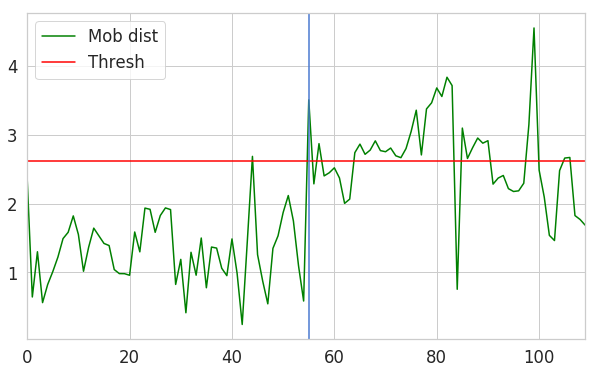

In [0]:
vline = anomaly_train.shape[0]
anomaly_alldata.plot(logy=False, figsize = (10,6), color = ['green','red']) #, ylim = [1e-1,1e3]
plt.axvline(x=vline)
#plt.axvline(x=pd.to_datetime('2018-11-07 08:30:00'))

*  set treshold min number of alert before anomaly to limit false alert -> parameter
*  run cov matrix for each kit and compare to prev/following/ecc week
*  automate with cycle
*  define length of window -> parameter






